# מעבדה 3 - כיול מצלמה  - בניית נתונים

עד כה יצרנו תצלומים באמצעות מצלמות אידאליות, שם הנקודה הראשית נמצאת בדיוק בראשית הצירים של מערכת התצלום.

על מנת שנוכל לבדוק מודלים של כיול של מצלמה, עלינו להכניס הזזה של הנקודה הראשית ועיוותי עדשה.

### חלק 1 - הנקודה הראשית

1.	כתבו פונקציה המייצרת נקודות במערכת התצלום כאשר הנקודה הראשית מוזזת מראשית הצירים. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from Camera import Camera
import PhotoViewer as pv
from SingleImage import SingleImage
import MatrixMethods

# def ShiftedPrincipalPoint(self, camera_points):
#     """
#     Points in camera space when principal point is shifted
#     :param camera_points: sampled image points
#     :param t: shifting from principal point

#     :type camera_points: np.array nx2
#     :type t: np.array 1X2

#     :return: shifted image points
#     """

#     shifted_camera_points = np.zeros([len(camera_points), 2])
#     shifted_camera_points[:, 0] = camera_points[:, 0] + self.principalPoint[0]
#     shifted_camera_points[:, 1] = camera_points[:, 1] + self.principalPoint[1]
#     return shifted_camera_points


2.	נגדיר את מיקום הנקודה הראשית xp=100; yp=200 מיקרון. כיצד ישתנו ערכי הנקודות במערכת התצלום. הסבירו איזה ערכים אתם צופים לקבל. באיזו סוג התמרה השתמשתם?

ביצענו הזזה של מערכת היחוס.
נחבר את ערכי ההזזה לערכי הנקודות שדגמנו במערכת התצלום.


In [2]:
# define camera
focal_length = 35  # [mm]
sensor_size = 24  # [mm]
xp=0.1  # [mm]
yp=0.2  # [mm]
camera1 = Camera(focal_length, np.array([xp, yp]), None, None, None, sensor_size)
img1 = SingleImage(camera1)
omega = 0
phi = 0
kappa = 0
Z = 50  # [m]
img1.exteriorOrientationParameters = np.array([[0, 0, Z, omega, phi, kappa]])

camera_points = np.array([[3, 3],
                          [7, 4],
                          [10, 8],
                          [12, 15],
                          [13, 13],
                          [16, 6]])  # [mm]
print(camera_points)

[[ 3  3]
 [ 7  4]
 [10  8]
 [12 15]
 [13 13]
 [16  6]]


3.	הראו שהפונקציה מחזירה את הערכים שלהם ציפיתם. 

In [3]:
shifted_points = camera1.ShiftedPrincipalPoint(camera_points)
print('~~~~~','\n',shifted_points)


~~~~~ 
 [[ 3.1  3.2]
 [ 7.1  4.2]
 [10.1  8.2]
 [12.1 15.2]
 [13.1 13.2]
 [16.1  6.2]]


4.	כתבו פונקציה המתקנת את הנקודות בהינתן ערכי הנקודה הראשית אל מערכת המצלמה. 

In [4]:
# def CorrectionToPrincipalPoint(self, camera_points):
#     """
#     Correction to principal point

#     :param camera_points: sampled image points

#     :type: np.array nx2

#     :return: corrected image points

#     :rtype: np.array nx2

#     .. warning::

#         This function is empty, need implementation

#     .. note::

#         The principal point is an attribute of the camera object, i.e., ``self.principalPoint``


#     """

#     corrected_camera_points = np.zeros([len(camera_points), 2])
#     corrected_camera_points[:, 0] = camera_points[:, 0] - self.principalPoint[0]
#     corrected_camera_points[:, 1] = camera_points[:, 1] - self.principalPoint[1]
#     return corrected_camera_points


5.	הראו כי פתרון התצלום לאחר התיקון מוביל לערכים צפויים. 

In [5]:
correted_points = camera1.CorrectionToPrincipalPoint(shifted_points)
print('~~~~~','\n',correted_points)


~~~~~ 
 [[ 3.  3.]
 [ 7.  4.]
 [10.  8.]
 [12. 15.]
 [13. 13.]
 [16.  6.]]


ניתן לראות שחזרנו לנקודות המקוריות- כלומר התיקון עבד כראוי

### חלק 2 - עיוותים רדיאליים

6.	השתמשו במודל של העיוותים הרדיאליים שניתנה בהרצאה. מה יהיו ערכי K1  ו-K2 כך שהעיוות המקסימלי בתמונה לא יעלה על 50 מיקרון והעיוות הנתרם על ידי K2 לא יעלה על 10 מיקרון. ניתן להניח ש-K3=0.  

In [6]:
# calculate k1, k2
# assume maximal radial distortions in the edges
r = np.sqrt((camera1.sensorSize/2 - camera1.principalPoint[0]) ** 2 +
            (camera1.sensorSize/2 - camera1.principalPoint[1]) ** 2)
# dr = k1*r^3+k2*r^5....
k2 = 0.01/(r**5)
k1 = (0.05-k2*r**5)/(r**3)
print('k1=','\n',k1)
print('k2=','\n',k2)

camera1.radial_distortions = np.array([k1,k2])


k1= 
 8.498618786855923e-06
k2= 
 7.56508704544768e-09


7.	הסתמכו על מודל העיוותים ועל K1 ו-K2 שמצאתם בסעיף הקודם, ובנו גרף המתאר את גודל העיוות הרדיאלי כתלות במרחק מהנקודה הראשית.

[9.50216756e-08 2.72936596e-06 3.33300211e-05 1.28518938e-04
 3.26017044e-04 6.64970945e-04 1.18646896e-03 1.93405719e-03
 2.95425560e-03 4.29707405e-03 6.01652843e-03 8.17115665e-03
 1.08245348e-02 1.40457931e-02 1.79101321e-02 2.24993387e-02
 2.79023021e-02 3.42155302e-02 4.15436652e-02 5.00000000e-02]


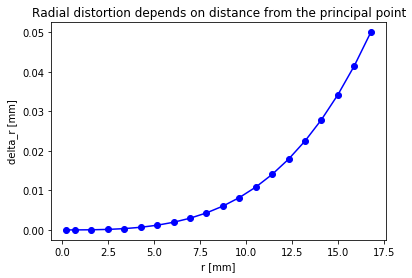

In [7]:
# create array of points in camera space
x = np.linspace(0, camera1.sensorSize/2, 20)
y = np.linspace(0, camera1.sensorSize/2, 20)
X = np.zeros((len(x),2))
X[:,0] = x
X[:,1] = y
# define the distnces from the principal point
r = np.sqrt((X[:, 0] - camera1.principalPoint[0]) ** 2 +
            (X[:, 1] - camera1.principalPoint[1]) ** 2)
# define the radial distortions (dr)
dx, dy, dr = camera1.ComputeRadialDistortions(X)
print(dr)
fig = plt.figure()
ax = plt.plot(r, dr, 'b-o')
plt.title('Radial distortion depends on distance from the principal point')
plt.xlabel('r [mm]')
plt.ylabel('delta_r [mm]')
plt.show()

ניתן לראות שככל שנקודת הדגימה רחוקה מהראשית כך העיוות גדל- באופן ריבועי

8.	כתבו פונקציה המוסיפה את העיוותים הרדיאליים (K1  ו-K2 ) של העדשה לנקודות במערכת התצלום. 

In [8]:
# def CorrectionToRadialDistortions(self, camera_points):
#     """
#     Correction to radial distortions for given points
#     :param camera_points: points in camera space
#     :type camera_points: np.array nx2
#     :return: correct points in camera space
#     :rtype: np.array
#     """
#     r = np.sqrt((camera_points[:, 0] - self.principalPoint[0])**2 +
#                 (camera_points[:, 1] - self.principalPoint[1])**2)
#     dx = (camera_points[:, 0] - self.principalPoint[0])*(self.radial_distortions[0]*r**2 + self.radial_distortions[1]*r**4)
#     dy = (camera_points[:, 1] - self.principalPoint[1])*(self.radial_distortions[0]*r**2 + self.radial_distortions[1]*r**4)
#     correct_camera_points = np.zeros([len(camera_points), 2])
#     correct_camera_points[:,0] = np.array([[camera_points[:, 0] + dx]])
#     correct_camera_points[:,1] = np.array([[camera_points[:, 1] + dy]])

#     return correct_camera_points


# create ground points
gcp = np.array([[20,20,0],
                [20,-20,0],
                [0,-20,0],
                [-20,-20,0],
                [-20,20,0],
                [0,20,0]])
# sampeling points in camera system
cameraPoints1 = img1.GroundToImage(gcp)
print('camera Points=','\n',cameraPoints1)

# corrected_points1 = camera1.CorrectionToPrincipalPoint(cameraPoints1)
# print('corrected points for principal point=','\n',corrected_points1)

corrected_points2 = camera1.CorrectionToRadialDistortions(cameraPoints1)
print('corrected points for radial distortion=','\n',corrected_points2)


camera Points= 
 [[ 14.  14.]
 [ 14. -14.]
 [  0. -14.]
 [-14. -14.]
 [-14.  14.]
 [  0.  14.]]
corrected points for radial distortion= 
 [[ 1.40607983e+01  1.40603609e+01]
 [ 1.40630383e+01 -1.40643988e+01]
 [-2.02136351e-04 -1.40287034e+01]
 [-1.40650914e+01 -1.40655530e+01]
 [-1.40628059e+01  1.40614696e+01]
 [-1.89295675e-04  1.40261228e+01]]


9.	השתמשו בערכי K1 ו-K2 שמצאתם בסעיף 6. הראו כיצד ישפיע מיקום שונה של הנקודה הראשית על גודל העיוות המדידות. 

[5.21858515e-02 4.09717901e-02 3.16810853e-02 2.40632800e-02
 1.78928369e-02 1.29671451e-02 9.10452655e-03 6.14224208e-03
 3.93449823e-03 2.35045343e-03 1.27222446e-03 5.92892853e-04
 2.14511330e-04 4.61101681e-05 1.70363069e-06 1.70363069e-06
 4.61101681e-05 2.14511330e-04 5.92892853e-04 1.27222446e-03
 2.35045343e-03 3.93449823e-03 6.14224208e-03 9.10452655e-03
 1.29671451e-02 1.78928369e-02 2.40632800e-02 3.16810853e-02
 4.09717901e-02 5.21858515e-02]


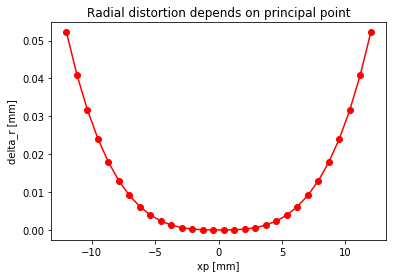

In [9]:
# create array of xp,yp
xp = np.linspace(-camera1.sensorSize/2, camera1.sensorSize/2, 30)
yp = np.linspace(-camera1.sensorSize/2, camera1.sensorSize/2, 30)
principal_points = np.zeros((len(xp), 2))
principal_points[:, 0] = xp
principal_points[:, 1] = yp
# check radial distortion for different xp,yp
check_point = np.array([[0,0]])
dr2 = np.zeros([len(xp)])
for i,p in enumerate(principal_points):
    camera1.principalPoint = p
    dx,dy,dr2[i] = camera1.ComputeRadialDistortions(check_point)

print(dr2)

plt.figure()
plt.plot(xp, dr2, 'r-o')  
plt.title('Radial distortion depends on principal point')
plt.xlabel('xp [mm]')
plt.ylabel('delta_r [mm]')
plt.show()


גודל הסנסור הוא סימטרי לכן הצגנו גרף של השינוי בעיוות הרדיאלי כתלות ב-xp בלבד.
ניתן לראות שככל ש-xp או yp גדלים כך העיוות גדל- באופן ריבועי


10.	שרטטו את העיוותים. השתמשו ב- ()plt.quiver. 

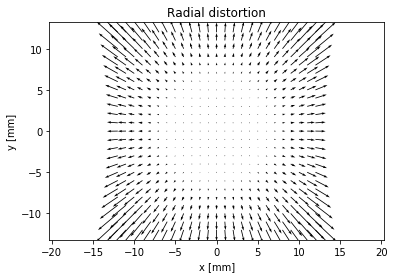

In [10]:
# plot the radial distortion
camera1.principalPoint = np.array([0.1, 0.2])

Xgrid = np.arange(-camera1.sensorSize/2, (camera1.sensorSize/2+1), 1)
Ygrid = np.arange(-camera1.sensorSize/2, (camera1.sensorSize/2+1), 1)
Xgrid, Ygrid = np.meshgrid(Xgrid, Ygrid)
DX = np.zeros((len(Xgrid),len(Xgrid)))
DY = np.zeros((len(Xgrid),len(Xgrid)))
for i in range(len(Xgrid[:,0])):
    for j in range(len(Xgrid[:,0])):
        DX[i,j],DY[i,j], DR = camera1.ComputeRadialDistortions(np.array([[Xgrid[i,j],Ygrid[i,j]]]))

plt.figure()
plt.quiver(Xgrid, Ygrid, DX, DY)
plt.title('Radial distortion')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.axis('equal')
plt.show()

11.	האם גודל העיוות הרדיאלי תלוי בפיזור נקודות הבקרה? נמקו.

כן.
פיזור נקודות הבקרה במערכת המצלמה משפיע על גודל העיוות בגדימה שלהן. 
הראנו שככל שהנקודה רחוקה יותר מהנקודה הראשית כך העיוות הרדיאלי גדול יותר.
לפיכך, במצב בו נרצה לצמצם את השפעת העיוות הרדיאלי על הדגימה של נקודות הבקרה, נמקם את המצלמות כך שנקודות הבקרה יהיו קרובות לנקודה הראשית ככל שניתן

12.	האם גודל העיוות הרדיאלי תלוי באוריינטציית התצלום? נמקו.

באופן ישיר גודל העיוות הרדיאלי תלוי במרחק מהראשית ובתיקון לנקודה הראשית.
לכן אוריינטציית המצלמה לא משפיע באופן ישיר.
באופן עקיף- אוריינטציה שונה גורמת לפיזור שונה של הנקודות במערכת המצלמה ולכן לאוריינטציה יכולה להיות השפעה.

In [11]:
!jupyter nbconvert  Lab3_CameraCalibratoin1.ipynb --to html

[NbConvertApp] Converting notebook Lab3_CameraCalibratoin1.ipynb to html
[NbConvertApp] Writing 388012 bytes to Lab3_CameraCalibratoin1.html
